In [0]:
from google.colab import auth
auth.authenticate_user()

In [2]:
!gsutil cp gs://undiagnosed-patient-one-data/Exome/variants.vcf /tmp/Exome_Variants.vcf

Copying gs://undiagnosed-patient-one-data/Exome/variants.vcf...
- [1 files][ 49.5 MiB/ 49.5 MiB]                                                
Operation completed over 1 objects/49.5 MiB.                                     


In [3]:
!head -10 /tmp/Exome_Variants.vcf

##fileformat=VCFv4.1
##fileDate=20190512
##contig=<ID=1,assembly=b37,length=249250621>
##contig=<ID=2,assembly=b37,length=243199373>
##contig=<ID=3,assembly=b37,length=198022430>
##contig=<ID=4,assembly=b37,length=191154276>
##contig=<ID=5,assembly=b37,length=180915260>
##contig=<ID=6,assembly=b37,length=171115067>
##contig=<ID=7,assembly=b37,length=159138663>
##contig=<ID=8,assembly=b37,length=146364022>


In [4]:
!pip install cython
!pip install numpy
!pip install vcfnp

     |████████████████████████████████| 8.1MB 4.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/01/9a/39/8cce4d51f15c588c78abfcbbd95859ca31077cfb8c28c2ff65
Successfully built vcfnp


In [90]:
from __future__ import print_function, division
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import vcfnp
vcfnp.__version__

'2.3.0'

In [6]:
file_name = "/tmp/Exome_Variants.vcf"
v = vcfnp.variants(file_name, cache=True).view(np.recarray)


[vcfnp] 2019-06-08 17:15:35.477847 :: caching is enabled
[vcfnp] 2019-06-08 17:15:35.481677 :: no cache file found
[vcfnp] 2019-06-08 17:15:35.483809 :: building array
[vcfnp] 2019-06-08 17:15:40.588419 :: saving to cache file /tmp/Exome_Variants.vcf.vcfnp_cache/variants.npy


In [23]:
v_pass = v[v.FILTER['PASS']]
v_pass.size

180195

In [27]:
variants_by_chrom = np.unique(v_pass.CHROM, return_counts=True)

array([b'1', b'10', b'11', b'12', b'13', b'14', b'15', b'16', b'17',
       b'18', b'19', b'2', b'20', b'21', b'22', b'3', b'4', b'5', b'6',
       b'7', b'8', b'9', b'MT', b'X', b'Y'], dtype='|S12')

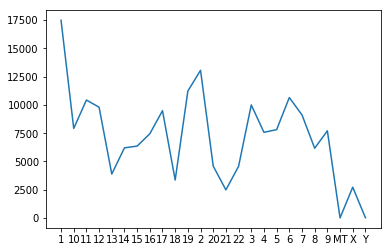

In [25]:
plt.plot(variants_by_chrom[0], variants_by_chrom[1])
plt.show()

In [0]:
concat_values = lambda row: str(row.REF.decode() + ' -> ' + row.ALT.decode())

In [0]:
def extract_unique_counts(f, arr):
  
  return np.transpose(np.asarray(np.unique(list(map(f, arr)), return_counts=True)))
  
  

In [0]:
def unique_counts_dict(arr):
  
  return { row[0]: float(row[1]) for row in arr}
  

In [125]:
unique_variations = extract_unique_counts(concat_values, v_pass)
unique_variations.shape

(5034, 2)

In [0]:
unique_vars_dict = { row[0]: float(row[1]) for row in unique_variations}

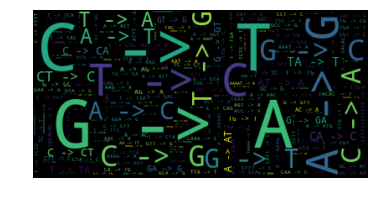

In [128]:
wordcloud = WordCloud(max_font_size=80).generate_from_frequencies(unique_vars_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.close()

In [0]:
def alteration_type(row):
  
  ref_l = len(row.REF)
  alt_l = len(row.ALT)
  
  if ref_l == alt_l:
    return 'Replace'
  elif ref_l > alt_l:
    return 'Deletion'
  else:
    return 'Insertion'

In [0]:
alteration_counts = extract_unique_counts(alteration_type, v_pass)

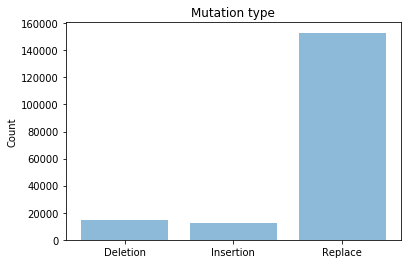

In [150]:
plt.bar(alteration_counts[:,0], alteration_counts[:,1].astype('float'), align='center', alpha=0.5)
plt.ylabel('Count')
plt.title('Mutation type')

plt.show()